In [3]:
import numpy as np
import pickle
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image


from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Format Data


train_images = pickle.load(open("data_clean/train_data", 'rb'))
train_labels = pickle.load(open("data_clean/train_label", 'rb'))
test_images = pickle.load(open("data_clean/test_data", 'rb'))
test_labels = pickle.load(open("data_clean/test_label", 'rb'))

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(2415, 72, 128, 3)
(2415,)
(269, 72, 128, 3)
(269,)


In [9]:

train_images = (train_images / 255)
test_images = (test_images / 255)
#train_images = np.expand_dims(train_images, axis=4)
#test_images = np.expand_dims(test_images, axis=4)

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)



(2415, 72, 128, 3)
(2415,)
(269, 72, 128, 3)
(269,)


Train on 2415 samples, validate on 269 samples
Epoch 1/10
2415/2415 [==============================] - 19s 8ms/sample - loss: 9.9689 - accuracy: 0.9143 - val_loss: 0.0752 - val_accuracy: 0.9777
Epoch 2/10
2415/2415 [==============================] - 20s 8ms/sample - loss: 0.0105 - accuracy: 0.9983 - val_loss: 0.0260 - val_accuracy: 0.9963
Epoch 3/10
2415/2415 [==============================] - 21s 9ms/sample - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0283 - val_accuracy: 0.9926
Epoch 4/10
2415/2415 [==============================] - 22s 9ms/sample - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0398 - val_accuracy: 0.9926
Epoch 5/10
2415/2415 [==============================] - 21s 9ms/sample - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0357 - val_accuracy: 0.9888
Epoch 6/10
2415/2415 [==============================] - 21s 9ms/sample - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0164 - val_accuracy: 0.9963
Epoch 7/10
2415/2415 [==============================] - 22s 9ms/sample 

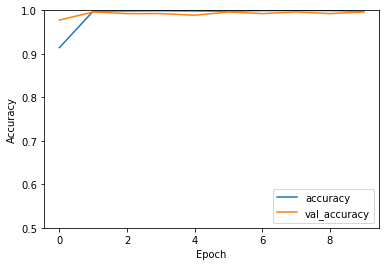

In [6]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(72, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [13]:
model.save('rick_morty.h5')

In [15]:
#Morty is a 1, Rick is a 2

a = pickle.load(open("test_cool_data.p", 'rb'))
a = np.float32(a)
predictions = model.predict(a)

  # Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

  # Check our predictions against the ground truths.
print([2,2,2,1,1])

[2 2 2 1 1]
[2, 2, 2, 1, 1]


(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)
(1, 35, 63, 32)


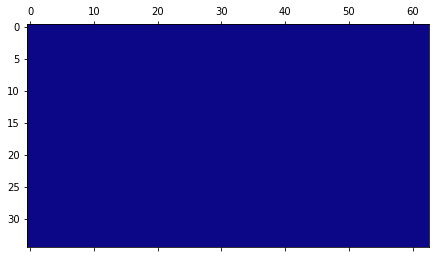

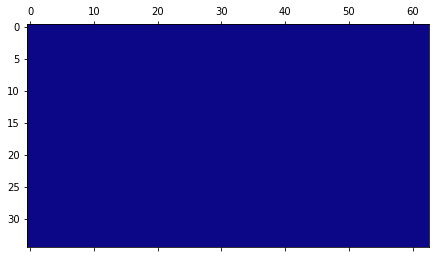

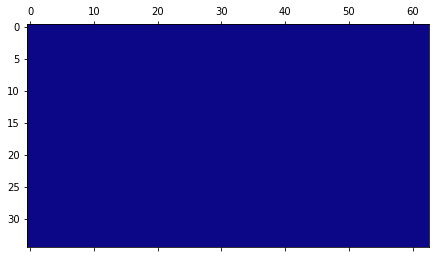

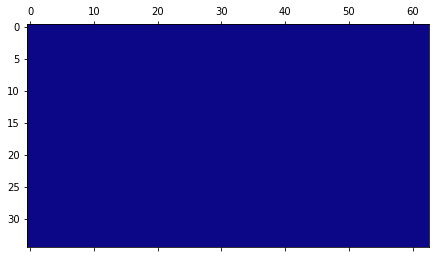

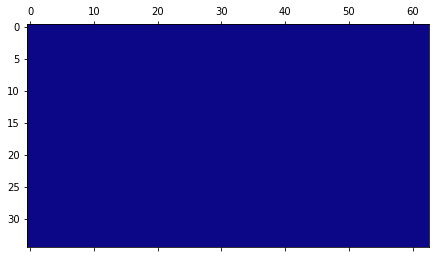

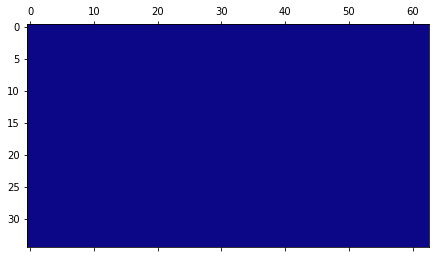

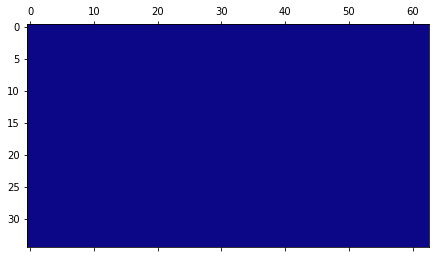

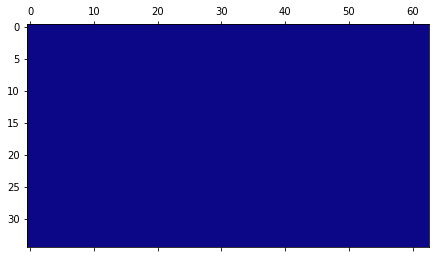

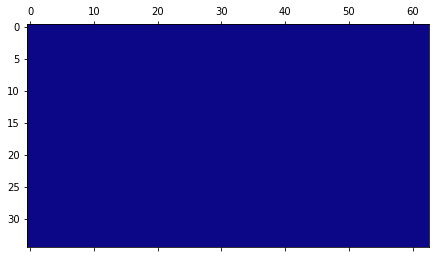

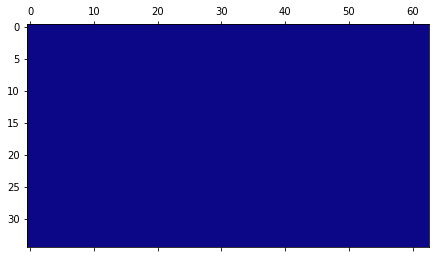

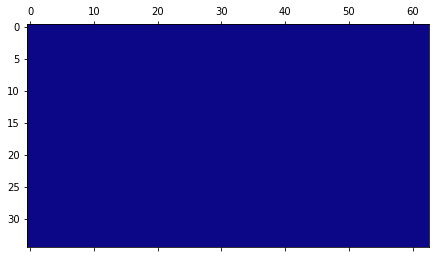

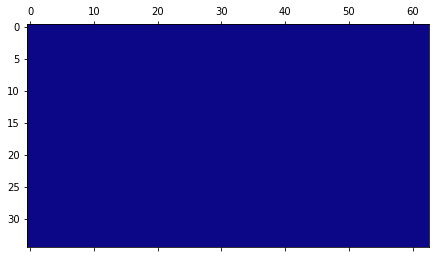

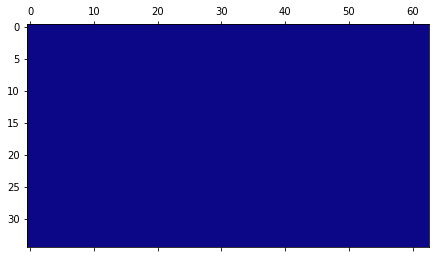

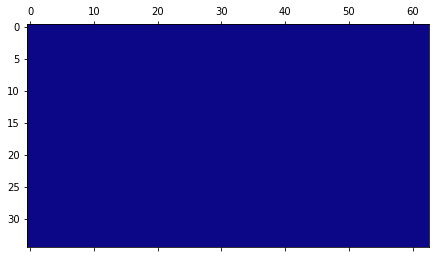

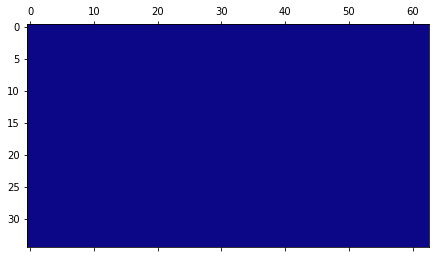

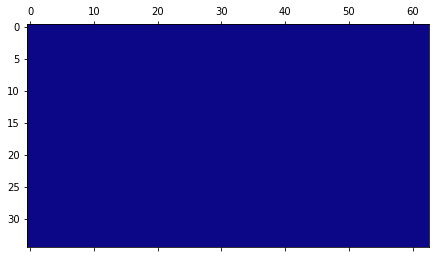

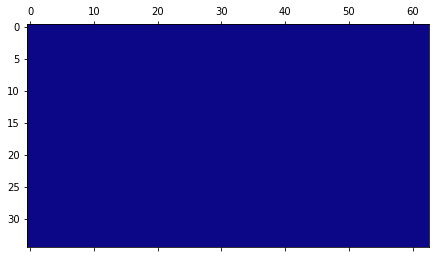

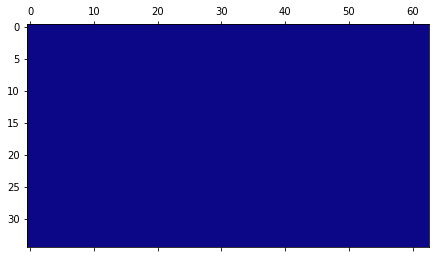

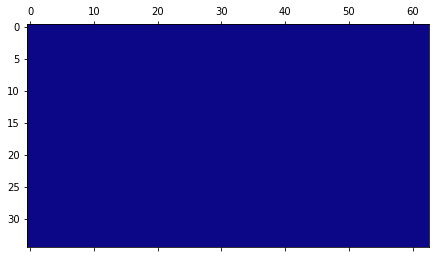

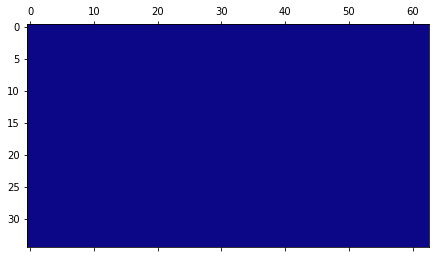

In [116]:
#img_path = 'output_data/screenshots/01screenshot0/01output1-044.jpg'
b = a[0]


    

    
#img = image.load_img(img_path, (72, 128, 3))
img_tensor = image.img_to_array(b)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.


layer_outputs = [layer.output for layer in model.layers] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
for i in range(0,20):
    first_layer_activation = activations[1]
    print(first_layer_activation.shape)
    plt.matshow(first_layer_activation[0, :, :,i], cmap='plasma')
    


c:\users\juan\pycharmprojects\test\venv\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
c:\users\juan\pycharmprojects\test\venv\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


TypeError: Invalid shape (5, 72, 128, 3) for image data

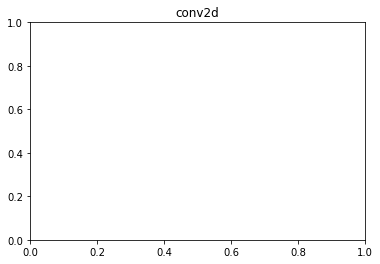